## Import Data

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")
import glob
import os

import random

# userAcceleration data
# float S8g = 4096.0;
# NewAcceleration = userAcceleration/S8g ;  
# unit = g

# rotationRate data (speed of rotation)
# float RFS2000 = 16.4;
# NewRotationRate = rotationRate/RFS2000 ;  
# unit = deg/s

# attitude "oriantation" (angle of rotation) 
# unit = deg

# gravity ( gravitional force on sensor axis)
# float S8g = 4096.0;
# NewGravity = gravity/S8g ;  
# unit = g

# Get data file names
START_T_COUNT = 0
START_F_COUNT = 500
SPLIT_T_RATIO = 0.7

path = r'D:\_1_Technicals\DataScience_Bootcamp\Final_project\Flutter_ArduinoConnect\02_Model_Trials\datasets\EDA_Phase\trial1'
filenames = glob.glob(path + "/*.csv")

# shuffeling the files as its always ordered alphabetic
random.seed(10)
shuffled_filenames = random.sample(filenames, len(filenames))


dfs = []
num_t = START_T_COUNT
num_f = START_F_COUNT
for filename in shuffled_filenames:
   
    df = pd.read_csv(filename, index_col=False)
    df.columns= ["time","rotR_x","rotR_y","rotR_z","acc_x","acc_y","acc_z","or_x","or_y","or_z","grav_x","grav_y","grav_z"]
    df.acc_x = df.acc_x/4096.0
    df.acc_y = df.acc_y/4096.0
    df.acc_z = df.acc_z/4096.0
    
    df.rotR_x = df.rotR_x/16.4
    df.rotR_y = df.rotR_y/16.4
    df.rotR_z = df.rotR_z/16.4
    
    df.grav_x = df.grav_x/4096.0
    df.grav_y = df.grav_y/4096.0
    df.grav_z = df.grav_z/4096.0
    
    _, tail = os.path.split(filename)
    df["action"] = str(tail).split(".")[0]
    

    if df.action.str.startswith("t_").sum():
        df["label"]= 1
        df["action_num"] = num_t # 0 - 30
        num_t +=1
    else:
        df["label"]= 0
        df["action_num"] = num_f # 100 - 122
        num_f +=1
    
    df = df.drop(columns="time").reset_index().rename(columns={"index":"time"})
    dfs.append(df)
df_all = pd.concat(dfs,axis=0).set_index("time")

In [92]:
df_all.shape

(10280, 15)

In [93]:
df_all

,rotR_x,rotR_y,rotR_z,acc_x,acc_y,acc_z,or_x,or_y,or_z,grav_x,grav_y,grav_z,action,label,action_num
time,,,,,,,,,,,,,,,
0,1.219512,0.182927,2.317073,-0.008545,0.007812,-0.006592,18,68,123,0.308105,-0.883301,0.352539,t_stand_front_drinksmallcup_10ml_1s_left,1,0
1,-0.426829,-0.304878,2.987805,-0.000977,-0.001709,-0.009033,17,68,123,0.305176,-0.884766,0.351562,t_stand_front_drinksmallcup_10ml_1s_left,1,0
2,-0.975610,0.304878,3.597561,0.000488,0.010498,-0.001953,17,68,123,0.302246,-0.885986,0.351074,t_stand_front_drinksmallcup_10ml_1s_left,1,0
3,-3.902439,2.682927,4.085366,0.004395,0.002930,-0.018311,17,68,123,0.298828,-0.887939,0.349121,t_stand_front_drinksmallcup_10ml_1s_left,1,0
4,-11.341463,5.609756,-0.548780,0.000000,0.022949,-0.002930,17,68,123,0.294922,-0.891846,0.342285,t_stand_front_drinksmallcup_10ml_1s_left,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,-2.500000,0.609756,3.048780,0.019775,-0.014160,-0.008545,-11,80,155,-0.197998,-0.965332,0.168701,t_stand_hold_drinksmallcup_10ml_1s_hold,1,30
164,-0.548780,1.585366,2.804878,0.014648,0.005615,-0.001709,-11,80,155,-0.199951,-0.965088,0.167725,t_stand_hold_drinksmallcup_10ml_1s_hold,1,30
165,-0.609756,1.829268,2.012195,0.014160,0.000732,-0.004395,-11,80,155,-0.200928,-0.965088,0.167236,t_stand_hold_drinksmallcup_10ml_1s_hold,1,30


In [94]:
df_all.describe()

,rotR_x,rotR_y,rotR_z,acc_x,acc_y,acc_z,or_x,or_y,or_z,grav_x,grav_y,grav_z,label,action_num
count,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000,10280.000000
mean,0.645903,-0.217650,0.989217,0.015352,-0.000973,-0.005411,-8.634630,44.144066,188.631323,-0.143357,-0.549473,0.502353,0.705837,160.187743
std,46.190426,30.474136,41.713982,0.071285,0.083417,0.066256,26.554959,35.626979,87.881588,0.415015,0.385081,0.321684,0.455688,226.690364
min,-252.560976,-214.756098,-204.512195,-0.414795,-0.616211,-0.527832,-66.000000,-74.000000,0.000000,-0.919678,-0.999512,-0.965576,0.000000,0.000000
25%,-12.865854,-7.576220,-10.914634,-0.011230,-0.031982,-0.027588,-30.000000,25.000000,111.000000,-0.505127,-0.813477,0.342224,0.000000,9.000000
50%,0.304878,0.426829,-0.182927,0.006836,0.000000,-0.001709,-4.000000,49.000000,210.000000,-0.087646,-0.684692,0.587646,1.000000,20.000000
75%,16.051829,7.621951,11.219512,0.042236,0.030273,0.018555,6.000000,64.000000,256.000000,0.109619,-0.353027,0.703918,1.000000,503.000000
max,477.012195,276.829268,202.682927,0.616943,0.559570,0.521240,84.000000,166.000000,359.000000,0.995117,0.699219,0.998047,1.000000,522.000000


In [95]:
(df_all.label == 1).sum()

7256

## Missig Data

In [96]:
pd.isna(df_all).sum()

rotR_x        0
rotR_y        0
rotR_z        0
acc_x         0
acc_y         0
acc_z         0
or_x          0
or_y          0
or_z          0
grav_x        0
grav_y        0
grav_z        0
action        0
label         0
action_num    0
dtype: int64

##  Class Balance

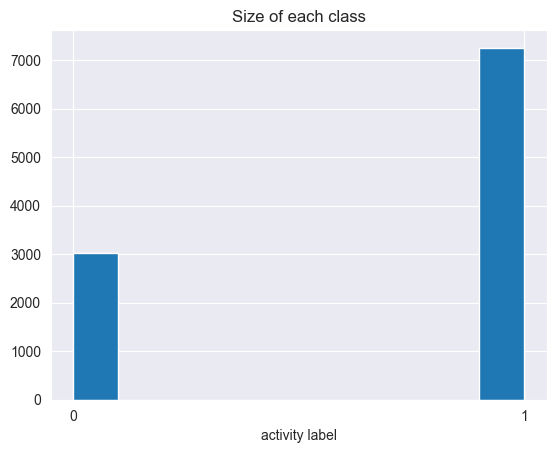

In [97]:
plt.title('Size of each class')
plt.xlabel('activity label')
plt.hist(df_all.label,rwidth=1)
plt.xticks([0,1]);

In [98]:
len(df_all.action_num.unique())

54

<Figure size 640x480 with 0 Axes>

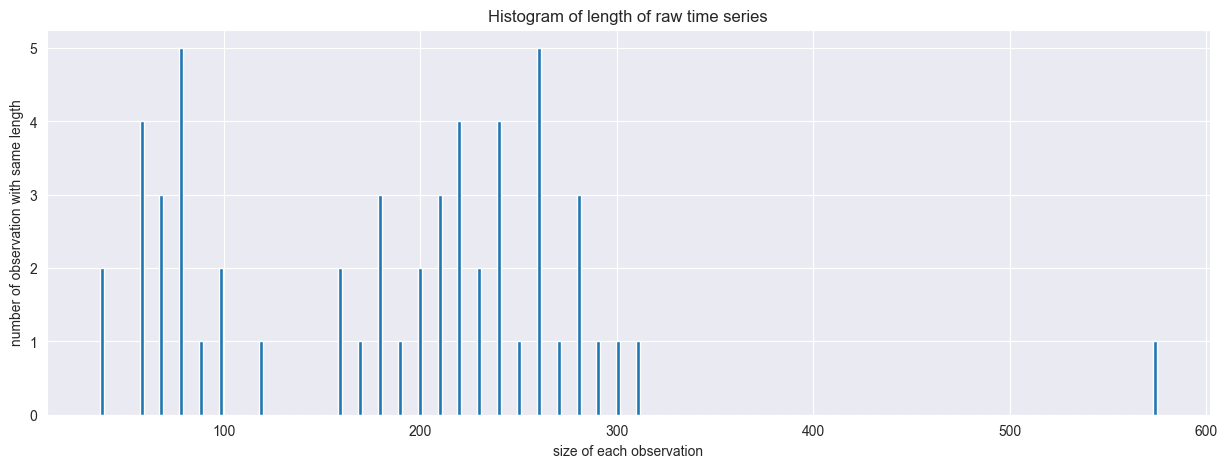

In [99]:
### Length of time series
action_num_list = df_all.action_num.unique()
series_length = list()
for act in action_num_list:
    series_length.append(df_all[(df_all.action_num == act)].shape[0])
plt.figure(2)
plt.figure(figsize=(15,5))
plt.title('Histogram of length of raw time series')
plt.hist(series_length,bins=len(action_num_list),rwidth=0.2,align='left');
#plt.xlim(0,350)
plt.xlabel("size of each observation")
plt.ylabel("number of observation with same length");

In [100]:
# There is too small and too large datasets
# lets analyze which is which
action_num_list = df_all.action_num.unique()
each_series_length = list()
for act in action_num_list:
    each_series_length.append((df_all[(df_all.action_num == act)].shape[0],act))
each_series_length.sort()

In [101]:
each_series_length[-1]

(584, 4)

In [102]:
#check the largest dataset
dataset_name = df_all[df_all.action_num == each_series_length[-1][1]].action.unique()[0]
print(f"The largest dataset size is {each_series_length[-1][0]} with name: {dataset_name}")

The largest dataset size is 584 with name: t_sit_hold_DrinkCup_10ml_1s_right


In [103]:
#check the smallest datasets
dataset_name = df_all[df_all.action_num == each_series_length[0][1]].action.unique()[0]
print(f"The shortest dataset size is:{each_series_length[0][0]} with name {dataset_name}")


The largest dataset size is:38 with name f_sit_front_EatFood_2sec_right


In [104]:
# drop the largest dataset
df_all = df_all[df_all.action_num != each_series_length[-1][1]]

<Figure size 640x480 with 0 Axes>

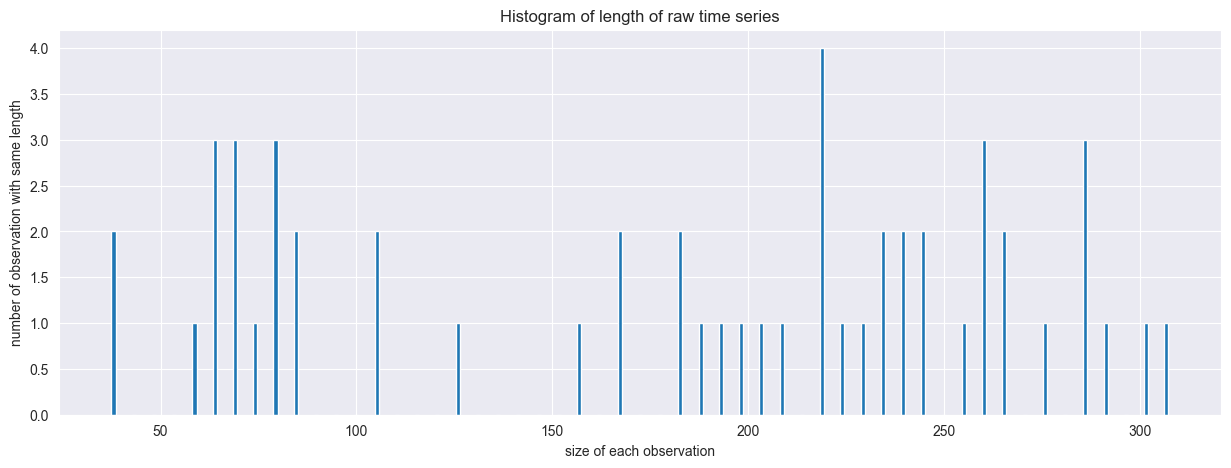

In [105]:
### Length of time series
action_num_list = df_all.action_num.unique()
series_length = list()
for act in action_num_list:
    series_length.append(df_all[(df_all.action_num == act)].shape[0])
plt.figure(2)
plt.figure(figsize=(15,5))
plt.title('Histogram of length of raw time series')
plt.hist(series_length,bins=len(action_num_list),rwidth=0.2,align='left');
#plt.xlim(0,350)
plt.xlabel("size of each observation")
plt.ylabel("number of observation with same length");

### Conclusion

From above analysis

1. This dataset raised concern on class imbalance. --> make sure to consider same number of  f and t dataset 
2. The distribution of time-series length is broad. --> average dataset size should be around 200 - 300 (4sec to 6sec)

## Feature engineering

In [106]:
df_all.insert(0, 'accel_x', df_all.acc_x + df_all.grav_x)
df_all.insert(1, 'accel_y', df_all.acc_y + df_all.grav_y)
df_all.insert(2, 'accel_z', df_all.acc_z + df_all.grav_z)
df_all.insert(3, 'accel_norm', np.sqrt(df_all.accel_x**2 + df_all.accel_y**2 + df_all.accel_z**2))

In [107]:
df_all = df_all.drop(['or_x', 'or_y', 'or_z', 'grav_x', 'grav_y', 'grav_z', 'acc_x', 'acc_y', 'acc_z'], axis=1)

In [108]:
df_all

,accel_x,accel_y,accel_z,accel_norm,rotR_x,rotR_y,rotR_z,action,label,action_num
time,,,,,,,,,,
0,0.299561,-0.875488,0.345947,0.987874,1.219512,0.182927,2.317073,t_stand_front_drinksmallcup_10ml_1s_left,1,0
1,0.304199,-0.886475,0.342529,0.997848,-0.426829,-0.304878,2.987805,t_stand_front_drinksmallcup_10ml_1s_left,1,0
2,0.302734,-0.875488,0.349121,0.989956,-0.975610,0.304878,3.597561,t_stand_front_drinksmallcup_10ml_1s_left,1,0
3,0.303223,-0.885010,0.330811,0.992281,-3.902439,2.682927,4.085366,t_stand_front_drinksmallcup_10ml_1s_left,1,0
4,0.294922,-0.868896,0.339355,0.978326,-11.341463,5.609756,-0.548780,t_stand_front_drinksmallcup_10ml_1s_left,1,0
...,...,...,...,...,...,...,...,...,...,...
163,-0.178223,-0.979492,0.160156,1.008374,-2.500000,0.609756,3.048780,t_stand_hold_drinksmallcup_10ml_1s_hold,1,30
164,-0.185303,-0.959473,0.166016,0.991204,-0.548780,1.585366,2.804878,t_stand_hold_drinksmallcup_10ml_1s_hold,1,30
165,-0.186768,-0.964355,0.162842,0.995681,-0.609756,1.829268,2.012195,t_stand_hold_drinksmallcup_10ml_1s_hold,1,30


## Data Splitting

In [109]:
num_t_ds = len(df_all.query("action_num < @START_F_COUNT").action.unique())
num_f_ds = len(df_all.query("action_num >= @START_F_COUNT").action.unique())

num_train_t = round(num_t_ds * SPLIT_T_RATIO)
num_train_f = round(num_f_ds * SPLIT_T_RATIO)

train_df = df_all[(df_all.action_num.between(START_T_COUNT,START_T_COUNT+num_train_t,inclusive="both"))|
                  (df_all.action_num.between(START_F_COUNT,START_F_COUNT+num_train_f,inclusive="both"))]

test_df = df_all[(df_all.action_num.between(START_T_COUNT+num_train_t,START_F_COUNT,inclusive="neither"))|
                  (df_all.action_num > START_F_COUNT+num_train_f)]

In [110]:
len(train_df.action_num.unique())

38

In [111]:
len(test_df.action_num.unique())

15

## Modeling

In [112]:
train_df.sample(3)

,accel_x,accel_y,accel_z,accel_norm,rotR_x,rotR_y,rotR_z,action,label,action_num
time,,,,,,,,,,
95,-0.703613,0.327881,0.824463,1.132394,86.890244,29.207317,12.682927,t_sit_left_DrinkBottle_10ml_1s_left,1,5
176,0.103760,-0.567627,0.785400,0.974587,119.878049,-28.597561,-93.231707,f_stand_hold_EatFood_2sec_front,0,507
15,-0.448486,-0.496094,0.654053,0.935433,67.500000,43.719512,117.743902,t_stand_hold_DrinkCup_50ml_3s_hold,1,13


In [113]:
X_train = train_df.iloc[:,:-3]
y_train = train_df.label

X_test = test_df.iloc[:,:-3]
y_test = test_df.label

In [114]:
X_train

,accel_x,accel_y,accel_z,accel_norm,rotR_x,rotR_y,rotR_z
time,,,,,,,
0,0.299561,-0.875488,0.345947,0.987874,1.219512,0.182927,2.317073
1,0.304199,-0.886475,0.342529,0.997848,-0.426829,-0.304878,2.987805
2,0.302734,-0.875488,0.349121,0.989956,-0.975610,0.304878,3.597561
3,0.303223,-0.885010,0.330811,0.992281,-3.902439,2.682927,4.085366
4,0.294922,-0.868896,0.339355,0.978326,-11.341463,5.609756,-0.548780
...,...,...,...,...,...,...,...
214,0.237061,-0.446777,0.872314,1.008335,-10.000000,1.341463,8.292683
215,0.242920,-0.456299,0.864990,1.007684,-4.268293,2.134146,7.682927
216,0.234863,-0.425293,0.869385,0.995924,0.487805,5.304878,6.158537


### DecisionTreeClassifier (baseline)

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [116]:
accuracy_score(y_train,dtc.predict(X_train))

0.8054573731090061

In [117]:
accuracy_score(y_test,dtc.predict(X_test))

0.7605794891345787

#### Analyze results

In [118]:
len(train_df.action.unique())

38

In [119]:
train_df_res = train_df[["action","action_num","label"]]
train_df_res["predict"] = dtc.predict(X_train)

C:\Users\Jacqueline\AppData\Local\Temp\ipykernel_18700\2135228749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_res["predict"] = dtc.predict(X_train)


In [120]:
for num in train_df_res.action.unique():
    print(num,train_df_res.query("(action == @num)").predict.unique())

t_stand_front_drinksmallcup_10ml_1s_left [1 0]
f_sit_hold_EatFood_2sec_front [0 1]
t_sit_hold_DrinkCup_10ml_1s_hold [0 1]
t_sit_left_DrinkBottle_10ml_1s_hold [0 1]
t_stand_right_DrinkBottle_10ml_1s_hold [1 0]
f_sit_front_EatFood_2sec_front [0 1]
f_stand_front_LookMobile_2sec_front [1 0]
t_sit_left_DrinkBottle_10ml_1s_left [0 1]
f_stand_hold_EatFood_2sec_left [1 0]
t_stand_hold_DrinkBottle_10ml_1s_right [1 0]
f_stand_front_EatFood_2sec_hold [0 1]
t_stand_left_drinksmallcup_10ml_1s_hold [1 0]
t_stand_front_DrinkBottle_10ml_1s_hold [1 0]
t_stand_hold_DrinkCup_10ml_1s_right [1]
f_stand_hold_LookMobile_2sec_hold [0 1]
f_sit_hold_EatFood_2sec_left [0 1]
f_stand_hold_EatFood_2sec_front [1 0]
t_sit_front_DrinkBottle_10ml_1s_front [0 1]
t_stand_hold_DrinkCup_10ml_1s_hold [0 1]
t_sit_hold_DrinkCup_10ml_1s_front [1 0]
f_sit_right_EatFood_2sec_right [0 1]
f_stand_hold_LookMobile_2sec_right [0 1]
f_stand_front_EatFood_2sec_right [1 0]
t_stand_hold_DrinkCup_50ml_3s_hold [1]
f_stand_front_EatFood_2se

### Random ForestClassifier (baseline)

In [121]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [122]:
accuracy_score(y_train,rfc.predict(X_train))

0.7975399406192564

In [123]:
accuracy_score(y_test,rfc.predict(X_test))

0.7750667174990469

### Neurel Network

In [246]:
from tensorflow import keras
from tensorflow.keras.models import Sequential,load_model

from tensorflow.keras.layers import Dense
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [247]:
input_dim = X_train.shape[1]
cnn = Sequential()
cnn.add(Dense(80, input_dim=input_dim, activation='relu'))
cnn.add(Dense(40, activation='relu'))
cnn.add(Dense(20, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [248]:
opt = keras.optimizers.Adam(learning_rate=0.01)

cnn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

#X_train, val_X, y_train, val_y = train_test_split(X_train, y_train, shuffle=True)

In [249]:
train_X = np.asarray(X_train)
train_y = np.asarray(y_train)
test_X = np.asarray(X_test)
test_y = np.asarray(y_test)
# val_X =  np.asarray(val_X)
# val_y =  np.asarray(val_y)

In [250]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [251]:
history = cnn.fit(train_X, train_y, epochs=100, batch_size=200,callbacks=[es,mc]
                  #, validation_data=(test_X,test_y)
                  ,validation_split=0.2
                  )


Epoch 1/100
28/29 [===========================>..] - ETA: 0s - loss: 0.9190 - accuracy: 0.6384
Epoch 1: val_accuracy improved from -inf to 0.74841, saving model to best_model.h5
29/29 [==============================] - 6s 102ms/step - loss: 0.9156 - accuracy: 0.6393 - val_loss: 0.5324 - val_accuracy: 0.7484
Epoch 2/100
27/29 [==========================>...] - ETA: 0s - loss: 0.5617 - accuracy: 0.6948
Epoch 2: val_accuracy improved from 0.74841 to 0.75053, saving model to best_model.h5
29/29 [==============================] - 1s 29ms/step - loss: 0.5599 - accuracy: 0.6967 - val_loss: 0.5407 - val_accuracy: 0.7505
Epoch 3/100
25/29 [========================>.....] - ETA: 0s - loss: 0.5474 - accuracy: 0.7012
Epoch 3: val_accuracy improved from 0.75053 to 0.75336, saving model to best_model.h5
29/29 [==============================] - 1s 30ms/step - loss: 0.5442 - accuracy: 0.7036 - val_loss: 0.5240 - val_accuracy: 0.7534
Epoch 4/100
27/29 [==========================>...] - ETA: 0s - loss: 

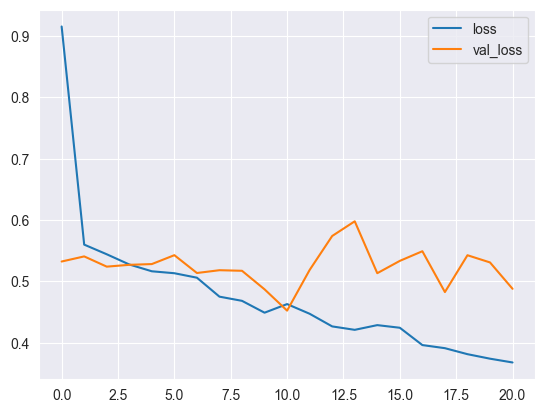

In [252]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss',"val_loss"]].plot()
plt.show()

#### Evaluation

- Evaluate last saved model (which is not the best option)

In [253]:
from sklearn.metrics import mean_absolute_error
 
predictions = cnn.predict(np.asarray(X_test))
mean_absolute_error(y_test, predictions)



82/82 [==============================] - 1s 4ms/step


0.26787414298234197

- Evaluate best model which was monitored and saved

In [256]:
X_train

,accel_x,accel_y,accel_z,accel_norm,rotR_x,rotR_y,rotR_z
time,,,,,,,
0,0.299561,-0.875488,0.345947,0.987874,1.219512,0.182927,2.317073
1,0.304199,-0.886475,0.342529,0.997848,-0.426829,-0.304878,2.987805
2,0.302734,-0.875488,0.349121,0.989956,-0.975610,0.304878,3.597561
3,0.303223,-0.885010,0.330811,0.992281,-3.902439,2.682927,4.085366
4,0.294922,-0.868896,0.339355,0.978326,-11.341463,5.609756,-0.548780
...,...,...,...,...,...,...,...
214,0.237061,-0.446777,0.872314,1.008335,-10.000000,1.341463,8.292683
215,0.242920,-0.456299,0.864990,1.007684,-4.268293,2.134146,7.682927
216,0.234863,-0.425293,0.869385,0.995924,0.487805,5.304878,6.158537


In [258]:
saved_model = load_model('best_model.h5')
_, train_acc = saved_model.evaluate(train_X, train_y, verbose=0)
_, test_acc = saved_model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.806, Test: 0.795


In [ ]:
#TODO use saved_model to predict data